# Analysis of the internal features of rent data

The data frame is from domain website and was gotten by API. 

This notebook shows the internal features of rent data.

In [19]:
import pandas as pd

# Read data
rent = pd.read_csv("../rent_data/renew(final).csv")

# See data
rent

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,dateListed,listingSlug,latitude,longitude
0,0,240.0,VIC,ApartmentUnitFlat,1.0,1.0,1,Melbourne Region,ELWOOD,3184,2022-09-12T17:48:43,7-23-bendigo-avenue-elwood-vic-3184-16085426,-37.885467,144.983170
1,1,690.0,VIC,Duplex,2.0,3.0,2,Melbourne Region,CAULFIELD SOUTH,3162,2022-09-12T17:36:10,1-12-omar-street-caulfield-south-vic-3162-1608...,-37.890450,145.019791
2,2,385.0,VIC,ApartmentUnitFlat,1.0,1.0,0,Melbourne Region,SOUTHBANK,3006,2022-09-12T17:32:37,602-250-city-road-southbank-vic-3006-16085393,-37.825733,144.959671
3,3,585.0,VIC,House,2.0,4.0,2,Melbourne Region,DROMANA,3936,2022-09-12T17:21:09,26-william-street-dromana-vic-3936-16085361,-38.330800,144.973984
4,4,450.0,VIC,ApartmentUnitFlat,1.0,2.0,2,Melbourne Region,MONTMORENCY,3094,2022-09-12T17:18:52,2-14-binns-street-montmorency-vic-3094-16085351,-37.716026,145.122162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2071,1000.0,VIC,Townhouse,3.0,3.0,3,Eastern Suburbs,MONT ALBERT,3127,2022-08-22T15:57:33,1-803-whitehorse-road-mont-albert-vic-3127-160...,-37.816353,145.111465
1294,2072,430.0,VIC,House,1.0,2.0,1,Melbourne Region,BRUNSWICK WEST,3055,2022-08-22T15:51:11,715-5-olive-york-way-brunswick-west-vic-3055-1...,-37.758736,144.939041
1295,2073,440.0,VIC,House,2.0,4.0,2,Melbourne Region,DEANSIDE,3336,2022-08-22T15:45:02,19-amreli-st-deanside-vic-3336-15176030,-37.738228,144.703522
1296,2074,680.0,VIC,Townhouse,2.0,2.0,2,Melbourne Region,BLACK ROCK,3193,2022-08-22T15:18:16,4-31-bayview-crescent-black-rock-vic-3193-1605...,-37.968330,145.016400


### Data Pre-processing

In [20]:
# initial number of rows
df_initial = rent.shape[0]
df_initial

1298

In [21]:
# Drop rows with missing values
rent.isnull().sum()

Unnamed: 0      0
price           7
state           0
propertyType    0
bathrooms       0
bedrooms        0
carspaces       0
region          0
suburb          0
postcode        0
dateListed      0
listingSlug     0
latitude        0
longitude       0
dtype: int64

In [22]:
# remove rows with missing values
rent = rent.dropna().reset_index(drop=True)

# check number of rows after removing missing values
rent.shape[0]

1291

In [23]:
# Check whether the data is positive or not
rent = rent[rent.price > 0]
rent = rent[rent.bedrooms > 0]
rent = rent[rent.bathrooms > 0]
rent = rent[rent.carspaces >= 0]
rent.shape[0]

1287

In [24]:
# change the number of bathrooms and bedrooms to int
rent.bathrooms = rent.bathrooms.astype(int)
rent.bedrooms = rent.bedrooms.astype(int)

# check
rent.head()

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,dateListed,listingSlug,latitude,longitude
0,0,240.0,VIC,ApartmentUnitFlat,1,1,1,Melbourne Region,ELWOOD,3184,2022-09-12T17:48:43,7-23-bendigo-avenue-elwood-vic-3184-16085426,-37.885467,144.983170
1,1,690.0,VIC,Duplex,2,3,2,Melbourne Region,CAULFIELD SOUTH,3162,2022-09-12T17:36:10,1-12-omar-street-caulfield-south-vic-3162-1608...,-37.890450,145.019791
2,2,385.0,VIC,ApartmentUnitFlat,1,1,0,Melbourne Region,SOUTHBANK,3006,2022-09-12T17:32:37,602-250-city-road-southbank-vic-3006-16085393,-37.825733,144.959671
3,3,585.0,VIC,House,2,4,2,Melbourne Region,DROMANA,3936,2022-09-12T17:21:09,26-william-street-dromana-vic-3936-16085361,-38.330800,144.973984
4,4,450.0,VIC,ApartmentUnitFlat,1,2,2,Melbourne Region,MONTMORENCY,3094,2022-09-12T17:18:52,2-14-binns-street-montmorency-vic-3094-16085351,-37.716026,145.122162


In [25]:
# drop the row with high price
rent = rent[rent.price < 2000]

# check
rent.shape[0]

1220

In [26]:
# save the data as csv
rent.to_csv("../rent_data/rent_cleaned.csv", index=False)

In [27]:
# select only the columns we need
cols = ["price", "bedrooms", "bathrooms", "carspaces", "postcode", "propertyType"]

### Correlation

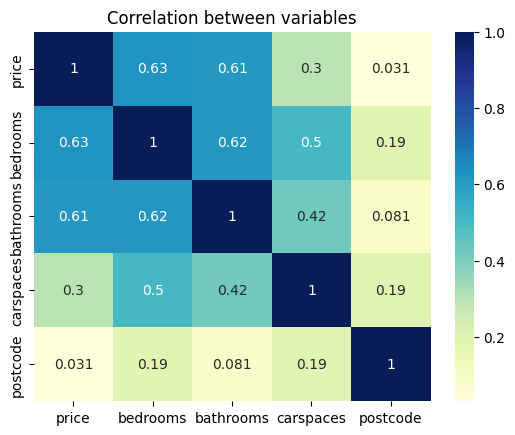

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data to see the correlation
pcm = sns.heatmap(rent[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between variables")
plt.show()

### 1 - The influence of number of bedrooms

In [29]:
# get the different data with different number of bedrooms
rent_1bedroom = rent[rent.bedrooms == 1]
rent_2bedroom = rent[rent.bedrooms == 2]
rent_3bedroom = rent[rent.bedrooms == 3]
rent_4bedroom = rent[rent.bedrooms == 4]
rent_5bedroom = rent[rent.bedrooms == 5]
rent_6bedroom = rent[rent.bedrooms == 6]
rent_7bedroom = rent[rent.bedrooms == 7]

In [30]:
# check the number of rows
print(rent_1bedroom.shape[0])
print(rent_2bedroom.shape[0])
print(rent_3bedroom.shape[0])
print(rent_4bedroom.shape[0])
print(rent_5bedroom.shape[0])
print(rent_6bedroom.shape[0])
print(rent_7bedroom.shape[0])

266
553
283
103
11
3
1


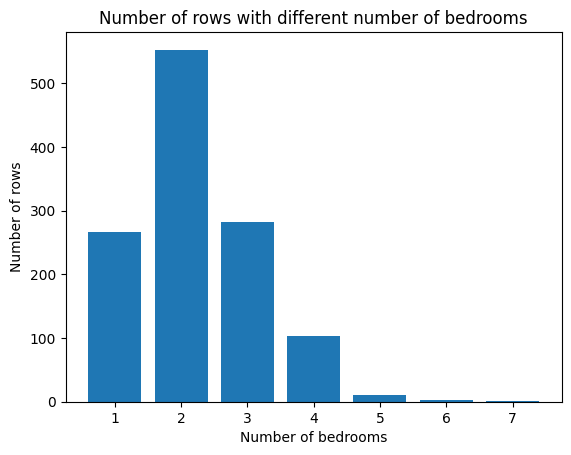

In [31]:
# plot the different bedrooms data
import matplotlib.pyplot as plt

bedrooms = [1, 2, 3, 4, 5, 6, 7]
bedrooms_shape = [rent_1bedroom.shape[0], rent_2bedroom.shape[0], rent_3bedroom.shape[0], 
                  rent_4bedroom.shape[0], rent_5bedroom.shape[0], rent_6bedroom.shape[0], 
                  rent_7bedroom.shape[0]]

plt.bar(bedrooms, bedrooms_shape)
plt.xlabel("Number of bedrooms")
plt.ylabel("Number of rows")
plt.title("Number of rows with different number of bedrooms")
plt.show()

In [32]:
# get the mean price of different number of bedrooms
mean1 = rent_1bedroom["price"].mean()
mean2 = rent_2bedroom["price"].mean()
mean3 = rent_3bedroom["price"].mean()
mean4 = rent_4bedroom["price"].mean()
mean5 = rent_5bedroom["price"].mean()
mean6 = rent_6bedroom["price"].mean()
mean7 = rent_7bedroom["price"].mean()

# create a list of mean price
mean_list = [mean1, mean2, mean3, mean4, mean5, mean6, mean7]
mean_list

[396.33458646616543,
 527.493670886076,
 727.8445229681979,
 921.8932038834952,
 939.5454545454545,
 1433.3333333333333,
 1400.0]

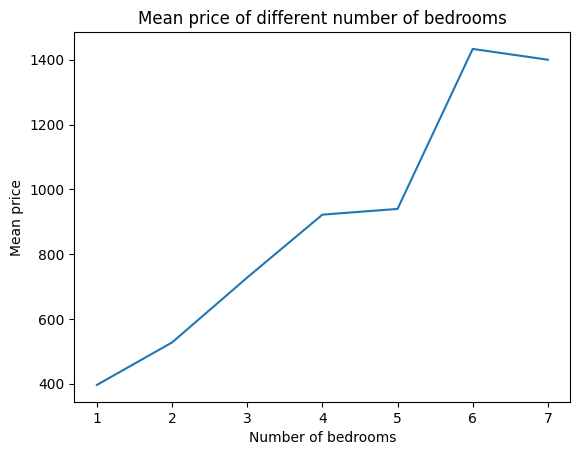

In [33]:
# plot the mean price of different number of bedrooms
plt.plot(bedrooms, mean_list)
plt.xlabel("Number of bedrooms")
plt.ylabel("Mean price")
plt.title("Mean price of different number of bedrooms")
plt.show()

In [34]:
def growth_rate (past, present):
    """
    This function takes in a dataframe and a column name
    and returns the growth rate of the column
    """
    # get the growth rate
    growth_rate = (present - past) / past
    
    return growth_rate

# get the growth rate
rate1 = growth_rate(mean1, mean2)
rate2 = growth_rate(mean2, mean3)
rate3 = growth_rate(mean3, mean4)
rate4 = growth_rate(mean4, mean5)
rate5 = growth_rate(mean5, mean6)
rate6 = growth_rate(mean6, mean7)
growth_rate_list = [rate1, rate2, rate3, rate4, rate5, rate6]

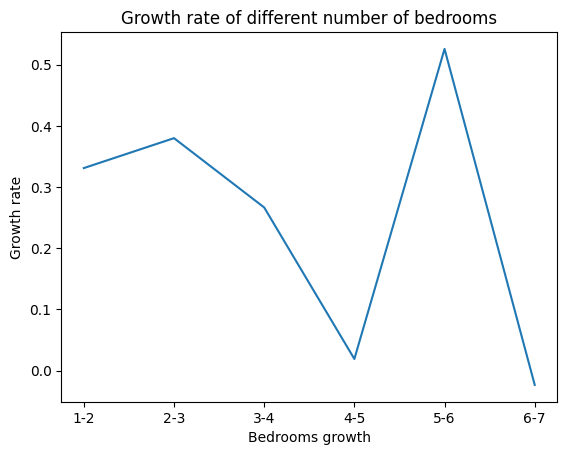

In [35]:
# plot the growth rate
growth_cols = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-7"]
plt.plot(growth_cols, growth_rate_list)
plt.xlabel("Bedrooms growth")
plt.ylabel("Growth rate")
plt.title("Growth rate of different number of bedrooms")
plt.show()

In [36]:
# Past several years data
# Data from https://www.dffh.vic.gov.au/moving-annual-rents-suburb-june-quarter-2022-excel

xlsx = pd.ExcelFile("../data/raw/rental.xlsx")

bedroom1_flat = pd.read_excel(xlsx, "1 bedroom flat")
bedroom2_flat = pd.read_excel(xlsx, "2 bedroom flat")
bedroom3_flat = pd.read_excel(xlsx, "3 bedroom flat")
bedroom2_house = pd.read_excel(xlsx, "2 bedroom house")
bedroom3_house = pd.read_excel(xlsx, "3 bedroom house")
bedroom4_house = pd.read_excel(xlsx, "4 bedroom house")

In [37]:
bedroom2_house.head()

,Moving annual median rent by suburb,Unnamed: 1,Lease commenced in year ending,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181
0,2 bedroom houses,NaN,Mar 2000,NaN,Jun 2000,NaN,Sep 2000,NaN,Dec 2000,NaN,...,Jun 2021,NaN,Sep 2021,NaN,Dec 2021,NaN,Mar 2022,NaN,Jun 2022,NaN
1,NaN,NaN,Count,Median,Count,Median,Count,Median,Count,Median,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
2,Inner Melbourne,Albert Park-Middle Park-West St Kilda,172,300,156,310,151,320,148,320,...,89,625,86,625,75,650,75,650,93,650
3,NaN,Armadale,66,290,70,290,64,298,62,300,...,40,650,39,650,38,648,36,663,39,675
4,NaN,Carlton North,204,250,217,260,221,260,200,260,...,134,580,141,585,119,590,115,595,129,600


### 2 - The influence of bathrooms

In [38]:
# get the different data with different number of bathrooms
rent_1bathroom = rent[rent.bathrooms == 1]
rent_2bathroom = rent[rent.bathrooms == 2]
rent_3bathroom = rent[rent.bathrooms == 3]
rent_4bathroom = rent[rent.bathrooms == 4]

# check there are not too many bathrooms
rent_bathroom = rent[rent.bathrooms > 4]

print(rent_1bathroom.shape[0], rent_2bathroom.shape[0], rent_3bathroom.shape[0], rent_4bathroom.shape[0], rent_bathroom.shape[0])

781 386 48 5 0


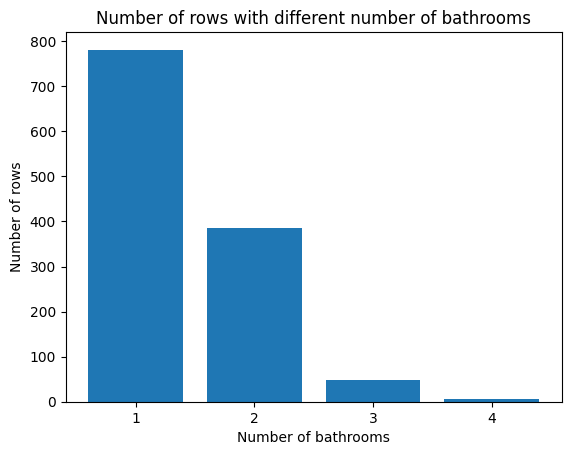

In [39]:
# plot different bathrooms data
plt.bar(["1", "2", "3", "4"], [rent_1bathroom.shape[0], rent_2bathroom.shape[0], rent_3bathroom.shape[0], rent_4bathroom.shape[0]])
plt.xlabel("Number of bathrooms")
plt.ylabel("Number of rows")
plt.title("Number of rows with different number of bathrooms")
plt.show()

In [40]:
# get the mean price of different number of bathrooms
mean_1bathroom = rent_1bathroom["price"].mean()
mean_2bathroom = rent_2bathroom["price"].mean()
mean_3bathroom = rent_3bathroom["price"].mean()
mean_4bathroom = rent_4bathroom["price"].mean()

# create a list of mean price
mean_bathroom = [mean_1bathroom, mean_2bathroom, mean_3bathroom, mean_4bathroom]
mean_bathroom

[481.2458386683739, 726.3756476683938, 1038.9583333333333, 1599.0]

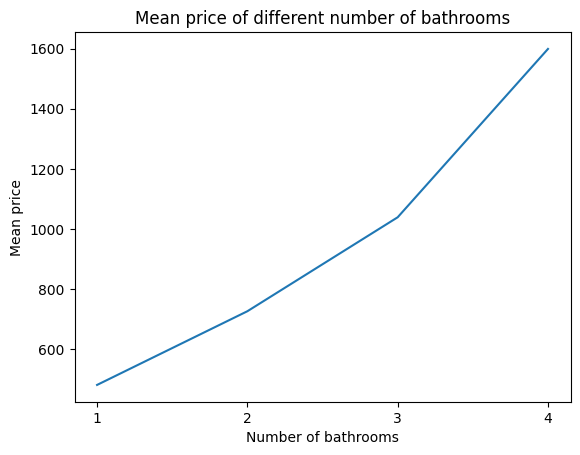

In [41]:
# plot the mean price of different number of bathrooms
plt.plot(["1", "2", "3", "4"], mean_bathroom)
plt.xlabel("Number of bathrooms")
plt.ylabel("Mean price")
plt.title("Mean price of different number of bathrooms")
plt.show()

In [42]:
# get the growth rate
rate1_bathroom = growth_rate(mean_1bathroom, mean_2bathroom)
rate2_bathroom = growth_rate(mean_2bathroom, mean_3bathroom)
rate3_bathroom = growth_rate(mean_3bathroom, mean_4bathroom)
growth_rate_bathrooms = [rate1_bathroom, rate2_bathroom, rate3_bathroom]
growth_rate_bathrooms

[0.5093650465182279, 0.4303320006229618, 0.5390415079205937]

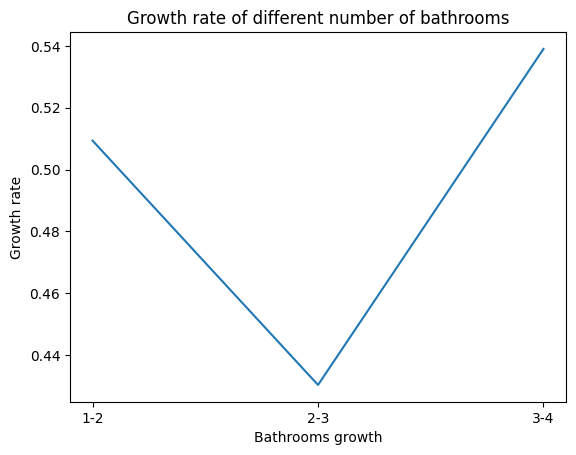

In [43]:
# plot the growth rate
plt.plot(["1-2", "2-3", "3-4"], growth_rate_bathrooms)
plt.xlabel("Bathrooms growth")
plt.ylabel("Growth rate")
plt.title("Growth rate of different number of bathrooms")
plt.show()

### 3 - The influence of Carspaces

In [44]:
# get the different data with different number of parking spaces
carspaces_0 = rent[rent.carspaces == 0]
carspaces_1 = rent[rent.carspaces == 1]
carspaces_2 = rent[rent.carspaces == 2]
carspaces_3 = rent[rent.carspaces == 3]
carspaces_ovr3 = rent[rent.carspaces > 3]

carspaces_list = [carspaces_0.shape[0], carspaces_1.shape[0], carspaces_2.shape[0], carspaces_3.shape[0], carspaces_ovr3.shape[0]]
carspaces_list

[192, 701, 282, 26, 19]

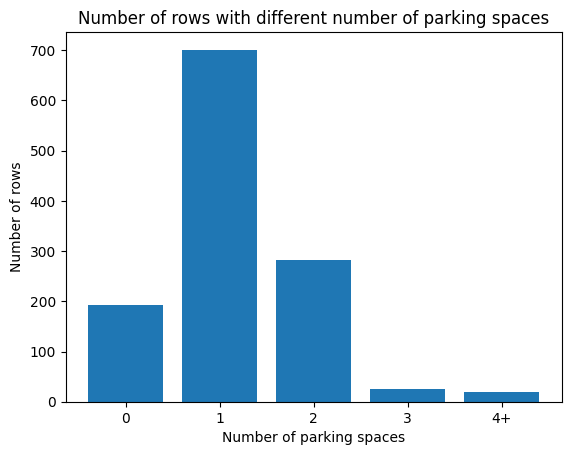

In [45]:
# plot different parking spaces data
plt.bar(["0", "1", "2", "3", "4+"], carspaces_list)
plt.xlabel("Number of parking spaces")
plt.ylabel("Number of rows")
plt.title("Number of rows with different number of parking spaces")
plt.show()

In [46]:
# get the mean price of different number of parking spaces
mean_0carspaces = carspaces_0["price"].mean()
mean_1carspaces = carspaces_1["price"].mean()
mean_2carspaces = carspaces_2["price"].mean()
mean_3carspaces = carspaces_3["price"].mean()
mean_ovr3carspaces = carspaces_ovr3["price"].mean()
mean_list_carspaces = [mean_0carspaces, mean_1carspaces, mean_2carspaces, mean_3carspaces, mean_ovr3carspaces]
mean_list_carspaces

[556.6666666666666,
 514.5192582025678,
 749.9539007092199,
 796.7307692307693,
 754.6842105263158]

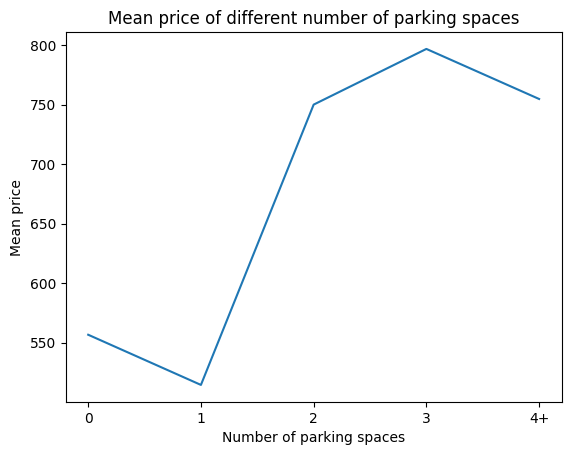

In [47]:
# plot the mean price of different number of parking spaces
plt.plot(["0", "1", "2", "3", "4+"], mean_list_carspaces)
plt.xlabel("Number of parking spaces")
plt.ylabel("Mean price")
plt.title("Mean price of different number of parking spaces")
plt.show()

In [48]:
# get the growth rate
rate0_carspaces = growth_rate(mean_0carspaces, mean_1carspaces)
rate1_carspaces = growth_rate(mean_1carspaces, mean_2carspaces)
rate2_carspaces = growth_rate(mean_2carspaces, mean_3carspaces)
rate3_carspaces = growth_rate(mean_3carspaces, mean_ovr3carspaces)
growth_rate_carspaces = [rate0_carspaces, rate1_carspaces, rate2_carspaces, rate3_carspaces]
growth_rate_carspaces

[-0.0757139074205368,
 0.45758178873444755,
 0.06237299182964882,
 -0.05277386079245906]

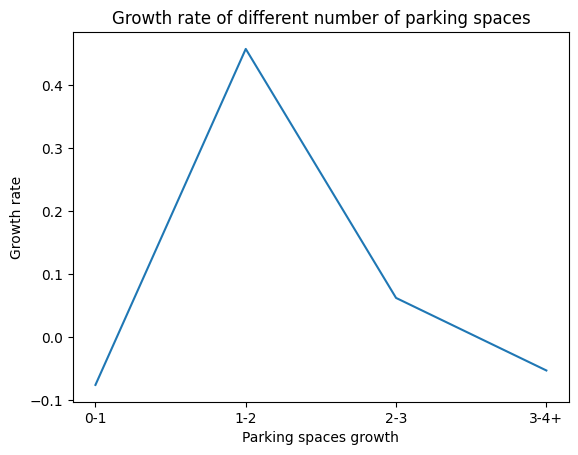

In [49]:
# plot the growth rate
plt.plot(["0-1", "1-2", "2-3", "3-4+"], growth_rate_carspaces)
plt.xlabel("Parking spaces growth")
plt.ylabel("Growth rate")
plt.title("Growth rate of different number of parking spaces")
plt.show()

In [ ]:
# external data about melbourne carspaces


### 4 - The influence of property types

In [50]:
# see how many different types of property
rent_count = rent.groupby("propertyType").count()
rent_count

,Unnamed: 0,price,state,bathrooms,bedrooms,carspaces,region,suburb,postcode,dateListed,listingSlug,latitude,longitude
propertyType,,,,,,,,,,,,,
ApartmentUnitFlat,745,745,745,745,745,745,745,745,745,745,745,745,745
Duplex,1,1,1,1,1,1,1,1,1,1,1,1,1
House,335,335,335,335,335,335,335,335,335,335,335,335,335
Studio,4,4,4,4,4,4,4,4,4,4,4,4,4
Terrace,1,1,1,1,1,1,1,1,1,1,1,1,1
Townhouse,133,133,133,133,133,133,133,133,133,133,133,133,133
Villa,1,1,1,1,1,1,1,1,1,1,1,1,1


In [51]:
# get the data with different property type
property_ApartmentUnitFlat = rent[rent.propertyType == "ApartmentUnitFlat"]
property_Duplex = rent[rent.propertyType == "Duplex"]
property_House = rent[rent.propertyType == "House"]
property_Studio = rent[rent.propertyType == "Studio"]
property_Townhouse = rent[rent.propertyType == "Townhouse"]
property_Terrace = rent[rent.propertyType == "Terrace"]
property_Villa = rent[rent.propertyType == "Villa"]

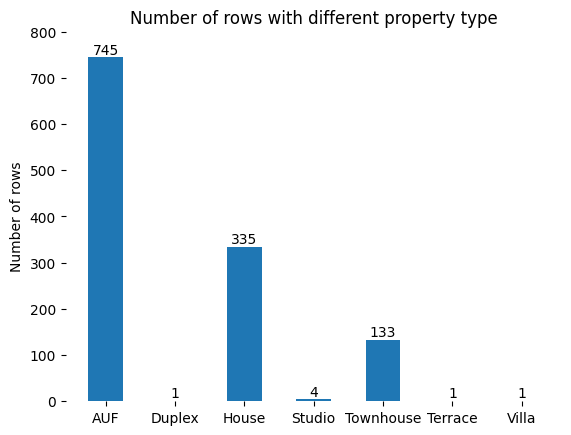

In [52]:
# plot different property type data
fig, ax = plt.subplots()

y_data = [property_ApartmentUnitFlat.shape[0], property_Duplex.shape[0], 
          property_House.shape[0], property_Studio.shape[0], 
          property_Townhouse.shape[0], property_Terrace.shape[0], 
          property_Villa.shape[0]]
x_data = ["AUF", "Duplex", "House", "Studio", "Townhouse", "Terrace", "Villa"]

bar = plt.bar(x_data, y_data, 0.5)

ax.set_title("Number of rows with different property type")
ax.set_ylabel("Number of rows")
ax.set_ylim(0, 800)

for a,b in zip(x_data, y_data):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [55]:
# get the mean price of different property type
mean_AUF = property_ApartmentUnitFlat["price"].mean()
mean_house = property_House["price"].mean()
mean_townhouse = property_Townhouse["price"].mean()

mean_property = [mean_AUF, mean_house, mean_townhouse]
mean_property

[488.8093959731544, 741.244776119403, 739.4661654135339]